In [1]:
import os
from pathlib import Path
from typing import Any, Callable, KeysView, List, Optional, Tuple, Union

import git
import matplotlib.pyplot as plt
import numpy as np
import PIL
from PIL.Image import Image
from PIL import ImageFont
from PIL import ImageDraw

In [2]:
def download_data(data_dir):
    git.Git(data_dir).clone("https://github.com/uwm-bigdata/wound-segmentation")

In [3]:
def get_data_dir() -> Path:
    data_dir = Path("../data")

    if not os.path.exists(data_dir):
        os.makedirs(data_dir, exist_ok=True)
    
    if "wound-segmentation" not in os.listdir(data_dir):
        download_data(data_dir)
        
    dfu_dataset_path = data_dir / "wound-segmentation" / "data" / "Foot Ulcer Segmentation Challenge"
    return dfu_dataset_path

In [5]:
dfu_dataset_path = get_data_dir()

In [ ]:
# images which have problematic labels

In [4]:
bad = [
    "0298.png",
    "0918.png",
    "0688.png",
    "0851.png",
    "0500.png",
    "0502.png",
    "0106.png",
    "0701.png",
    "0608.png",
    "0384.png",
    "0626.png",
    "0550.png",
    "0778.png",
    "0656.png",
    "0131.png",
    "0092.png",
    "0912.png",
    "0735.png",
    "0240.png",
    "0335.png",
    "0296.png",
    "0727.png",
    "0281.png",
    "0417.png",
    "0437.png",
    "0971.png",
    "0545.png",
    "0682.png",
]

In [6]:
# burn image name for patient sorting

In [22]:
def draw_watermark(img, text):
    draw = ImageDraw.Draw(img)
    font = ImageFont.truetype("Verdana.ttf", 25)
    draw.text((0, 0), text, (255, 0, 0), font=font)
    return img

In [26]:
for split in ["train", "validation", "test"]:
    split_path = dfu_dataset_path / split / "images"
    sort_path = dfu_dataset_path / split / "sort"
    os.makedirs(sort_path, exist_ok=True)
    for filename in os.listdir(split_path):
        image_path = os.path.abspath(split_path / filename)
        img = PIL.Image.open(image_path)
        img = draw_watermark(img, filename)
        output_path = sort_path / filename
        img.save(output_path)

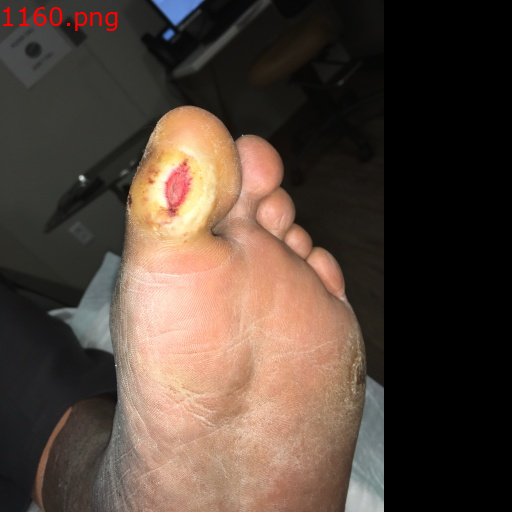

In [27]:
img